In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generating some sample time series data
date_range = pd.date_range(start='2024-01-01', end='2024-04-30')
data = np.random.randn(len(date_range))
ts = pd.Series(data, index=date_range)

In [3]:
ts.head(10)

2024-01-01    1.171106
2024-01-02    1.325392
2024-01-03   -1.602060
2024-01-04   -0.819873
2024-01-05    0.776475
2024-01-06    0.660179
2024-01-07    1.819101
2024-01-08   -0.018268
2024-01-09   -1.136928
2024-01-10   -0.906190
Freq: D, dtype: float64

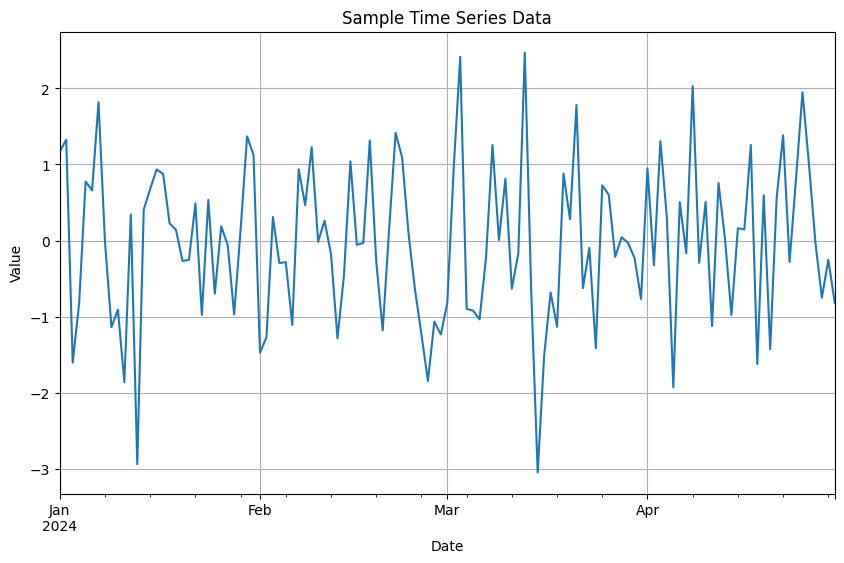

In [4]:
# Visualizing the time series data
plt.figure(figsize=(10, 6))
ts.plot()
plt.title('Sample Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [5]:
# Basic statistics of the time series data
print("Basic Statistics of Time Series Data:")
print(ts.describe())


Basic Statistics of Time Series Data:
count    121.000000
mean      -0.028349
std        1.037861
min       -3.044877
25%       -0.814902
50%       -0.022180
75%        0.725950
max        2.470418
dtype: float64


In [6]:
# Rolling statistics (e.g., rolling mean and standard deviation)
rolling_mean = ts.rolling(window=7).mean()
rolling_std = ts.rolling(window=7).std()

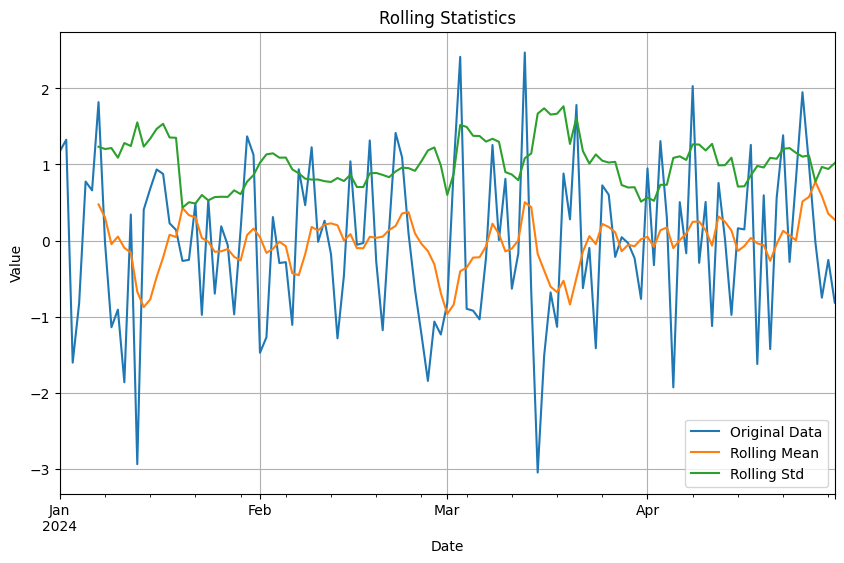

In [7]:
# Visualizing rolling statistics
plt.figure(figsize=(10, 6))
ts.plot(label='Original Data')
rolling_mean.plot(label='Rolling Mean')
rolling_std.plot(label='Rolling Std')
plt.title('Rolling Statistics')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


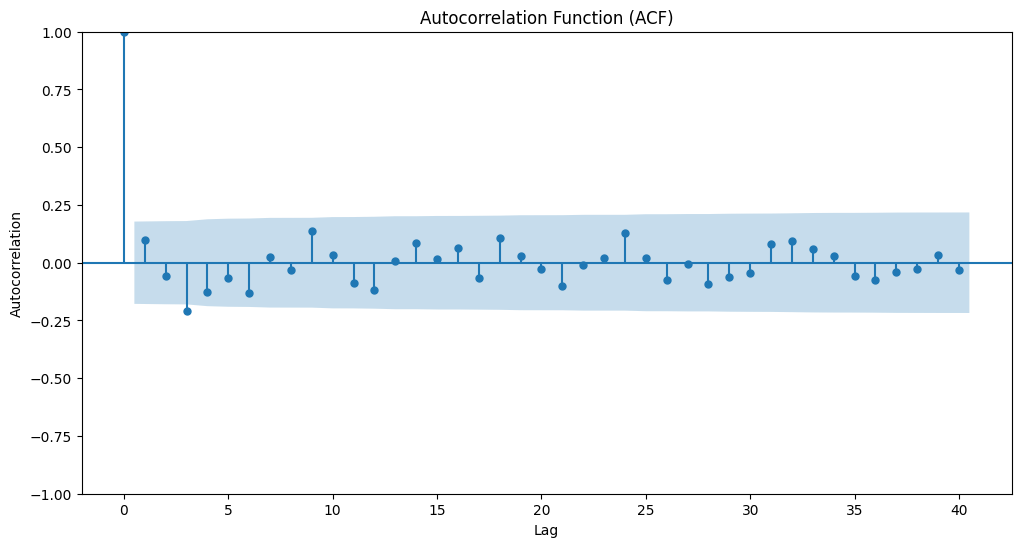

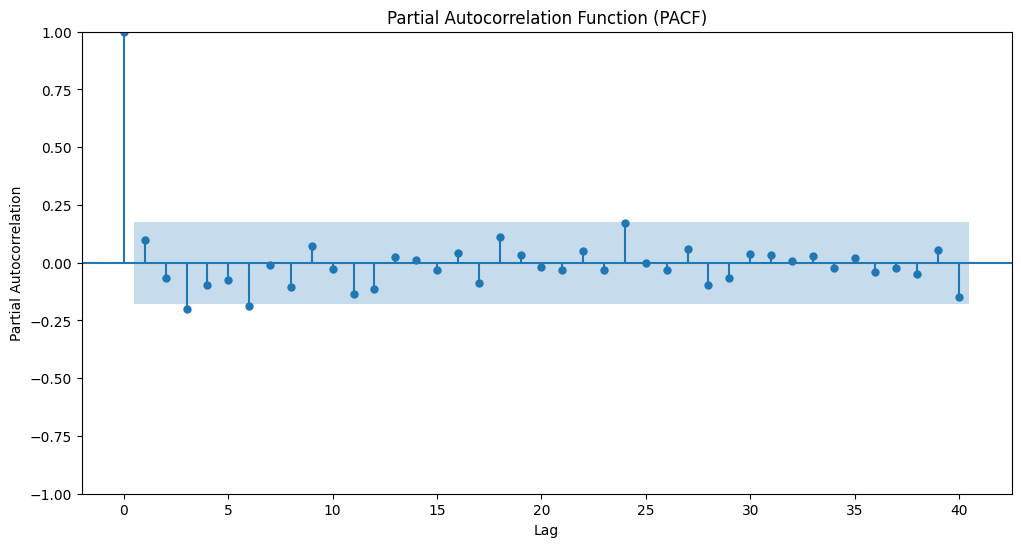

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF plot
plt.figure(figsize=(12, 6))
plot_acf(ts, lags=40, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# PACF plot
plt.figure(figsize=(12, 6))
plot_pacf(ts, lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

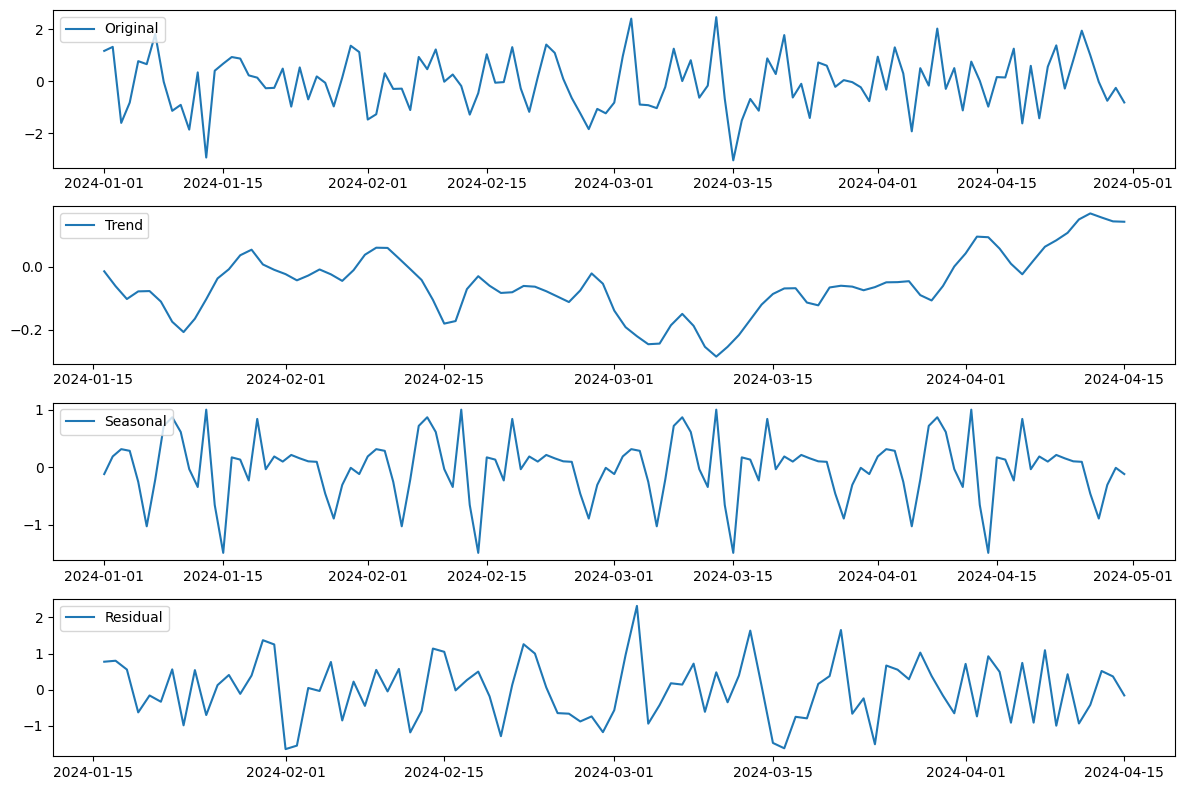

In [9]:
# Seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts, model='additive', period=30)  # Assuming seasonality period of 30 days

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Visualizing seasonal decomposition
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(ts, label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()